In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from getBoost import getLHEevents,getBoost,getInfo,ParticleList

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
fList = ['../pp2C1C1/Events/run_01/unweighted_events.lhe.gz',
        '../pp2C1C1/Events/run_04/unweighted_events.lhe.gz',
         '../pp2C1C1/Events/run_02/unweighted_events.lhe.gz',
        '../pp2C1C1/Events/run_03/unweighted_events.lhe.gz']

In [3]:
infoDict = {f : getInfo(f) for f in fList}

In [5]:
for f,infoD in infoDict.items():
    nevents,events = getLHEevents(f)
    c1 = ParticleList.fromEvents(events,nevents,[1000024])
    infoD.update({'c1' : c1})

In [34]:
infoDictS = {key : val for key,val in sorted(list(infoDict.items()), key = lambda x: x[1]['mC1'])}

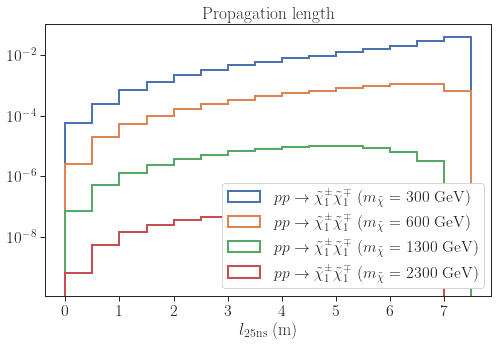

In [36]:
plt.figure(figsize=(8,5))
bins=np.arange(0.,8.0,0.5)
for infoD in infoDictS.values():
    c1 = infoD['c1']
    l = np.array(c1.Beta)*3e8*25e-9
    w = c1.weightList
    label = infoD['process']
    label += r' ($m_{\tilde{\chi}}$ = %1.0f GeV)' %infoD['mC1']    
    plt.hist(l,bins=bins,weights=w,
             histtype='step',label=label,linewidth=2)

# plt.hist(n1,bins=20,density=True,histtype='step',label=r'$\tilde{\chi}_1^0$',linewidth=2)
plt.legend(loc='lower right',framealpha=1.0)
plt.yscale('log')
plt.xlabel(r'$l_{\rm 25ns}$ (m)')
plt.title('Propagation length')

plt.show()

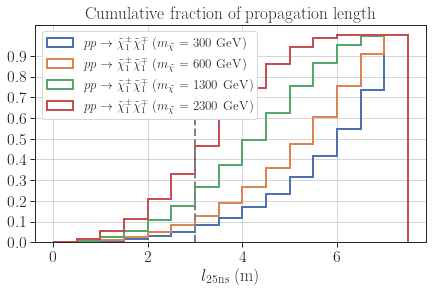

In [35]:
plt.figure(figsize=(7,4))
bins=np.arange(0.,8.0,0.5)
for infoD in infoDictS.values():
    c1 = infoD['c1']
    l = np.array(c1.Beta)*3e8*25e-9
    w = np.array(c1.weightList)
    w = w/sum(w)
    label = infoD['process']
    label += r' ($m_{\tilde{\chi}}$ = %1.0f GeV)' %infoD['mC1']
    plt.hist(l,bins=bins,weights=w,cumulative=True,
             histtype='step',label=label,linewidth=2)

# plt.hist(n1,bins=20,density=True,histtype='step',label=r'$\tilde{\chi}_1^0$',linewidth=2)
plt.legend(loc='upper left',framealpha=1.0,fontsize=13)
plt.vlines(x=3.0,ymin=0.,ymax=1.0,linestyle='dashed',linewidth=2,color='gray')
# plt.yscale('log')
plt.xlabel(r'$l_{\rm 25ns}$ (m)')
plt.xlabel(r'$l_{\rm 25ns}$ (m)')
plt.yticks(np.arange(0.,1.,0.1))
plt.grid()
plt.title('Cumulative fraction of propagation length')
# plt.savefig('boost_chargino.png')
plt.show()

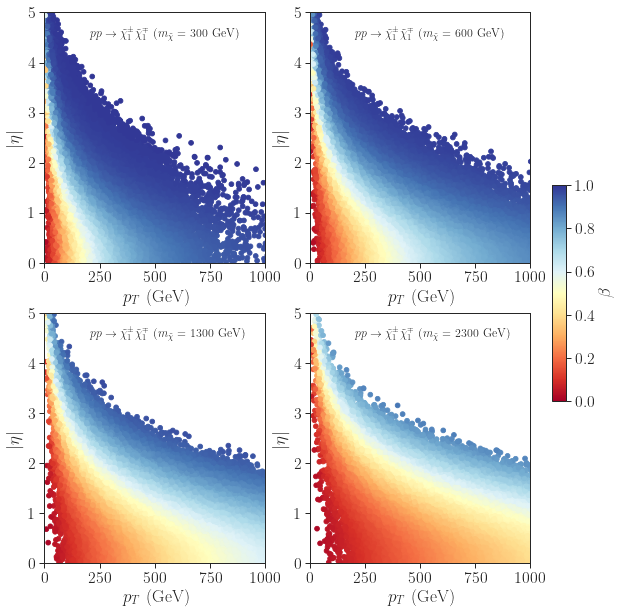

In [77]:
fig,axarray = plt.subplots(nrows=int(np.ceil(len(infoDict)/2)),
                           ncols=2,figsize=(10,len(infoDict)*1.5))
for i,infoD in enumerate(infoDictS.values()): 
    ax = axarray.reshape(-1)[i]
    c1 = infoD['c1']
    r = ax.scatter(c1.PT,np.abs(c1.Eta),c=c1.Beta,cmap=cm,vmin=0.,vmax=1.0)    
    ax.set_xlabel('$p_T$ (GeV)')
    ax.set_ylabel('$|\eta|$')
    ax.set_xlim(0.,1000.)
    ax.set_ylim(0.,5.0)
    label = infoD['process']
    label += r' ($m_{\tilde{\chi}}$ = %1.0f GeV)' %infoD['mC1']
    ax.text(200.0,4.5,label,fontsize=12)
    # ax.set_title(label)

fig.subplots_adjust(right=0.8,top=1.4)
cbar_ax = fig.add_axes([0.83, 0.5, 0.02, 0.5])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(r,label=r'$\beta$',cax=cbar_ax)
# plt.tight_layout()
plt.show()

In [20]:
c1Sel = ParticleList()
c1Sel.particleList = [c for c in c1.particleList if c.Beta*3e8*25e-9 < 3.0]

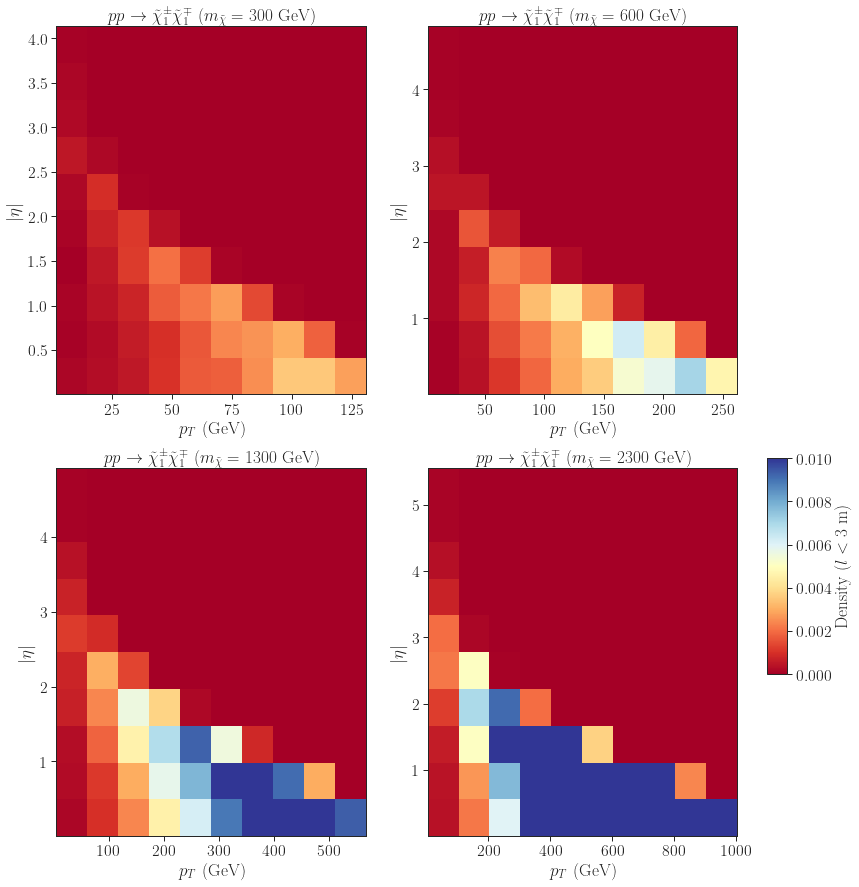

In [91]:
fig,axarray = plt.subplots(nrows=int(np.ceil(len(infoDict)/2)),
                           ncols=2,figsize=(14,len(infoDict)*1.5))
for i,infoD in enumerate(infoDictS.values()): 
    ax = axarray.reshape(-1)[i]
    c1 = infoD['c1']
    c1Sel.particleList = [c for c in c1.particleList if c.Beta*3e8*25e-9 < 3.0]
    r = ax.hist2d(c1Sel.PT,np.abs(c1Sel.Eta),bins=10,vmin=0.,vmax=1e-2,
           weights=[1/len(c1.particleList)]*len(c1Sel.particleList),cmap=cm)
  
    ax.set_xlabel('$p_T$ (GeV)')
    ax.set_ylabel('$|\eta|$')
    # ax.set_xlim(0.,1000.)
    # ax.set_ylim(0.,5.0)
    label = infoD['process']
    label += r' ($m_{\tilde{\chi}}$ = %1.0f GeV)' %infoD['mC1']
    # ax.text(200.0,4.5,label,fontsize=12)
    ax.set_title(label)

fig.subplots_adjust(right=0.8,top=2)
cbar_ax = fig.add_axes([0.83, 0.5, 0.02, 0.5])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(r[3],label=r'Density ($l < 3$ m)',cax=cbar_ax)
# plt.tight_layout()
plt.show()